In [85]:
import time
import random

# Set seed.
random.seed(a=100)

# Create our default list.
short_list = list(random.sample(range(1000000), 10))
long_list = list(random.sample(range(1000000), 10000))

Now that we've covered some basic data structures, let's get into the things we can _do_ with those structures a little more. Sure, we've covered some basic operations like adding and deleting elements, but what about more complex processes?

These processes are called algorithms. (Ok, they're actually all technically within the class of algorithms, but these are algorithms we really think of as algorithms, rather than just single steps).

Algorithms lend themselves to a lot of comparisons to try to illustrate what they are. Some people call them recipes. Others call them directions. The key is this: it's the set of steps necessary for a computer to accomplish a specific task.

But what kind of task?

Really any kind of task you want. But the most common to discuss (and the most common to show up in interviews) is sorting. Now, there are many many kinds of sorting algorithms, a brief summary of which you can get from the [Sorting Algorithm wiki page](https://en.wikipedia.org/wiki/Sorting_algorithm).

We won't cover all of them here, but we'll talk about a few of them to draw out differences in performance, efficiency, and style.

As a note, above we're defining `short_list` and `long_list` which will be our default random lists. The short one will be used to validate that our algorithm works, and the long list to compare computation times across sorting strategies. Standardizing both will let us use them as the same baselines for each algorithm we explore. We're also only going to use lists here, but this does generalize more broadly.

## The Task of Sorting

Just for completeness, let's briefly review what we mean by sorting. The most common example used to talk about methods of sorting is a hand of cards. When you get a hand of cards in a game you want to organize them is some kind of reasonable fashion. This makes it easier to know what cards are in your hand, and to find and access the cards you want.

Now, there are many different ways to sort. Everyone kind of has their own method. Some will pick cards up one and a time and sequence them as they go. Others will move through their hand reorganizing card by card. You could even just randomly shuffle them again and again until they are sorted (though this would not be a very efficient approach). Different methods work best in different games and with different sized hands. These same general concepts apply to sorting lists.

All of our lists will have a set of values, in our case integers ranging from 0 to 1,000,000. Our goal is to return this list ordered from smallest to largest in the least amount of time. In situations where there are duplicates, those duplicates will maintain their original order (this preserves _stability_ in our algorithm). Our goal is to sort the list as efficiently as possible. This will be _measured_ in runtime, but also _discussed_ in terms of steps.

## Insertion Sort

One of the simplest methods of sorting is the _insertion sort_. In this case we maintain two lists. First is our original list. Then we have a new list, which will be ordered. To add elements to that list, we take an element from our original list and then move through our new list, stopping and inserting it in the appropriate place. We do this by placing it in the position ahead of the first element in the new list that is larger than our chosen element. If none are larger then it is added to the end.

This gives the nice property that our result will always be a sorted list which will grow to encompass the entire original set.

Let's write it up quickly.

In [2]:
def insert_sort(input_list):
    # Copy the input to a new list so we don't modify the original.
    new_list = input_list
    
    # Iterate through the list.
    for i in range(len(new_list)):
        # Assign place to a new variable.
        j = i
        
        # Move through the list as long as the previous position is larger
        # than the current element of list.
        while j > 0 and new_list[j - 1] > new_list[j]:
            
            # Swap places.
            new_list[j - 1], new_list[j] = new_list[j], new_list[j - 1]
            
            # Reduce j by one.
            j = j - 1
    return new_list

You can think about insertion sort as being like organizing a poker hand from left to right, where you scan your hand from left to right, picking up out of place cards when you see them and moving them to the left as far as they need to go. Here is an visualization from Wikipedia:

![Animated insertion sort visualization](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

If you want to play around with insertion sort or other algorithms visually, check out [VisuAlgo](https://visualgo.net/en/sorting). Feel free to escape out of the slides and tinker directly with the visualizations.

The Python function above implements this algorithm and makes each individual _step_ clear. Lets apply it to our short and long lists.

In [3]:
# Start the timer.
start_time = time.time()

# Run our insertion sort.
insert_sort(short_list)

# Print time to show runtime.
print("--- %s seconds ---" % (time.time() - start_time))
print(insert_sort(short_list))

--- 0.00013899803161621094 seconds ---
[152745, 183236, 366725, 412125, 477025, 481850, 739784, 767514, 808225, 997948]


In [4]:
# Test on the long list.
start_time = time.time()

insert_sort(long_list)

print("--- %s seconds ---" % (time.time() - start_time))

--- 13.495858192443848 seconds ---


So that seems to work! We've created a reasonable insertion sort that works through the list piecewise and inserts each element in the appropriate spot.

However this also revealed something else important about insertion sort: it doesn't scale well. We noticed that it took 11 seconds on the long list. That's an unacceptably long amount of time. This is because its best case time is very different from its worst case.

If the list is already ordered this kind of sort takes n steps to complete. It simply iterates through the list. However, if your list is perfectly out of order it can take asymptotically n-squared steps (in big-O notation, $\mathcal{O}(n^2)$) as we have $n$ elements and our algorithm will potentially look through each element in the sorted list before inserting the element. This means computation can get more intensive quite quickly, as evidenced by the runtime of our long list. Think about what a square function looks like if you graph it. It grows at an ever increasing rate. The [wiki for Insertion Sort](https://en.wikipedia.org/wiki/Insertion_sort#Best.2C_worst.2C_and_average_cases) includes this lovely animation showing this method and the challenge that comes from it.

![Insertion sort](https://upload.wikimedia.org/wikipedia/commons/4/42/Insertion_sort.gif)

So, how could we do better?

## Merge Sort

One method for improving this is to use a _merge sort_. Merge sort takes advantage of fact that merging two small sorted lists into one large sorted list is fast. Merge sort starts by breaking our large list into single element sublists. It's a bit wonky, but if you think about it these single-element lists are each inherently ordered. Then we merge those single-element lists together into ordered pairs, reading from a single end to preserve their order. We repeat this process and arrive ultimately at a sorted list.

This will look much more complex in code but the concept is easier to understand with an example. Let's try it first with a very basic manual walkthrough.

If our list were `[3, 7, 2, 4]` The algorithm would first break it up into four pieces `[3], [7], [2], [4]`. Then we could split that into two groups and merge each by order, resulting in `[3, 7], [2, 4]`. Finally we bring those two lists together to get `[2, 3, 4, 7]`. It's more efficient because in any merge we only have to look at the leading entry from each prior list. For that final merge in the first step we're only comparing 3 to 2 and 4 to 7, since we already know 4 and 7 are larger than their prior entries.

Why does that give us an advantage? It's because we won't have to handle large unordered data. We always know what's next in any merge is from one of two places (the next element in each of our two lists we're merging). It's over really long lists that this advantage becomes decidedly worthwhile. This technique is called _divide and conquer_. Our insertion sort tries to solve the whole problem in one piece. Sometimes that's great. But in the case of sorting a long list, that process is inefficient. By breaking our task into smaller ones, in this case sorting small lists and then merging those ordered lists together, we make significant gains in efficiency. Here's a bigger example.

![Animated merge sort](https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif)

This tradeoff is a common feature of algorithms. It's often easiest to write something that tries to solve the problem all in one go. The logic is often easier to visualize. However, thinking about how to break one big problem into several smaller problems is a common way to gain efficiency.

Here's what the code for a merge sort looks like (with `merge` written as a separate function):

In [5]:
# Our merge function takes two ordered lists and merges them together into one ordered list

def merge(a, b):
    # Check for empty list.
    if len(a) == 0 or len(b) == 0:
        return a or b
    
    # Start with an empty result.
    result = []
    # Track two indexes.
    i, j = 0, 0
    # Set a while condition to ensure we iterate only for the length of our two lists.
    while (len(result) < len(a) + len(b)):
        # If a's next element is lower append that element to our result.
        if a[i] < b[j]:
            result.append(a[i])
            i += 1
        # Otherwise append b's next element.
        else:
            result.append(b[j])
            j += 1
        # When one list is empty just append everything from the other list and stop.
        if i == len(a) or j == len(b):
            result.extend(a[i:] or b[j:])
            break 

    return result

def merge_sort(lst):
    if len(lst) < 2:
        return lst

    mid = int(len(lst) / 2)
    a = merge_sort(lst[:mid])
    b = merge_sort(lst[mid:])

    return merge(a, b)


In [6]:
# Test on short list.
# Start timer.
start_time = time.time()

# Run our insertion sort.
merge_sort(short_list)

# Print time to show runtime.
print("--- %s seconds ---" % (time.time() - start_time))
print(insert_sort(short_list))

--- 0.0001621246337890625 seconds ---
[152745, 183236, 366725, 412125, 477025, 481850, 739784, 767514, 808225, 997948]


In [7]:
# Test on long list.
start_time = time.time()

merge_sort(long_list)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0934898853302002 seconds ---


Now, this algorithm is implemented _recursively_, meaning the function nests within itself, running multiple times until a stopping condition is met. This is how we create multiple layers of lists to merge together. Recursion, again, is a common feature of algorithms. It's a way of nesting an algorithm within itself so that it keeps going until the problem is actually solved and you don't have to specify how many times something should run.

It is also much, much faster, a tenth of a second instead of 11 seconds, and less complex: $\mathcal{O}(n\log{}n)$ instead of $\mathcal{O}(n^2))$.

This break-down-and-merge method means that when combining shorter lists into longer lists, we can use the knowledge that the shorter lists are already sorted to cut down on the number of comparisons we need to make.  As a result, we don't have to potentially look through all other sorted elements in order to place a single element of our list. It no longer scales quadtratically, but in quasilinear time.

## The Default Sort Method

Now, all of this is fine and dandy, but it's not the only way to sort things.

We also have a simpler way. Kind of a cheating way. Python lists have a built in `.sort()` method and there's also the built-in `sorted()` function. Let's see how that performs.

In [8]:
# Start Timer
start_time = time.time()

# Sort the default list. Note that .sort() will sort in place, which would alter default_list.
sorted(long_list)

# Print time to show runtime
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0006909370422363281 seconds ---


Now that is much faster than either of ours, so for most cases it's worth just using the built ins. The reasons for this efficiency are many and partially have to do with the fact that it isn't actually written in Python, but Cython, which allows it to run in a version of C from Python that is much faster than generic Python.

So why are you learning slow ways to sort that take a lot of work to implement? It's worth understanding how these algorithms function at their most basic level and how we can work with them to build our own bespoke tools. The more complex algorithms you'll implement later will rely on these fundamentals.

## DRILL

Return to the [sorting wiki page](https://en.wikipedia.org/wiki/Sorting_algorithm) and pick an algorithm we haven't covered here (you probably want to pick one of the simpler ones, but it's up to you. Implement it in Python below and see how it compares in sorting our short and long lists. You should be able to easily find guides on how to implement any of the algorithms. Can you figure out why it runs faster or slower than our other sorting algorithms?

Some good sorts to try are:
* Heap Sort
* Selection Sort
* QuickSort

In [132]:
# Quicksort

def quicksort(A, lo = 0, hi = None):
    
    # if lo, hi are not given, set defaults and proceed (i.e. when the function is first called)
    if hi == None:
        hi = len(A) - 1

    if lo < hi:
        p = partition(A, lo, hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)

def partition(A, lo, hi):
    pivot = A[hi]
    i = lo
    
    for j in range(lo,hi):
        if A[j] < pivot:
            tmp = A[i]
            A[i] = A[j]
            A[j] = tmp
            i += 1
            
    tmp = A[i]
    A[i] = A[hi]
    A[hi] = tmp
    return i

I got the algorithm to work, but it changes data inplace. Therefore if you change the A variable below and then run the following cell you can time it for various lists. 

In [142]:
A = long_list.copy()

In [144]:
start_time = time.time()

quicksort(A)

# Print time to show runtime
print('Long list run-time:\n')
print("--- %s seconds ---" % (time.time() - start_time))

Long list run-time:

--- 0.02394866943359375 seconds ---


This outperform the merge sort given above!

In [136]:
import matplotlib.pyplot as plt

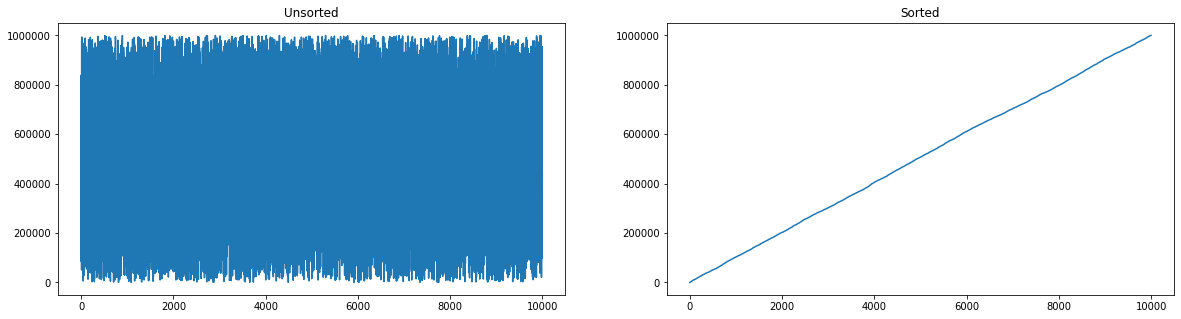

In [146]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(long_list)
plt.title('Unsorted')

plt.subplot(1,2,2)
plt.plot(A)
plt.title('Sorted')

plt.show()

A quick plot to prove it sorted the data